In [1]:
import pandas as pd 

In [2]:
data = pd.read_csv('waterQuality.csv')

In [3]:
data

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
0,1.65,9.08,0.04,2.85,0.007,0.35,0.83,0.17,0.05,0.20,...,0.054,16.08,1.13,0.007,37.75,6.78,0.08,0.34,0.02,1
1,2.32,21.16,0.01,3.31,0.002,5.28,0.68,0.66,0.90,0.65,...,0.100,2.01,1.93,0.003,32.26,3.21,0.08,0.27,0.05,1
2,1.01,14.02,0.04,0.58,0.008,4.24,0.53,0.02,0.99,0.05,...,0.078,14.16,1.11,0.006,50.28,7.07,0.07,0.44,0.01,0
3,1.36,11.33,0.04,2.96,0.001,7.23,0.03,1.66,1.08,0.71,...,0.016,1.41,1.29,0.004,9.12,1.72,0.02,0.45,0.05,1
4,0.92,24.33,0.03,0.20,0.006,2.67,0.69,0.57,0.61,0.13,...,0.117,6.74,1.11,0.003,16.90,2.41,0.02,0.06,0.02,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7994,0.05,7.78,0.00,1.95,0.040,0.10,0.03,0.03,1.37,0.00,...,0.197,14.29,1.00,0.005,3.57,2.13,0.09,0.06,0.03,1
7995,0.05,24.22,0.02,0.59,0.010,0.45,0.02,0.02,1.48,0.00,...,0.031,10.27,1.00,0.001,1.48,1.11,0.09,0.10,0.08,1
7996,0.09,6.85,0.00,0.61,0.030,0.05,0.05,0.02,0.91,0.00,...,0.182,15.92,1.00,0.000,1.35,4.84,0.00,0.04,0.05,1
7997,0.01,10.00,0.01,2.00,0.000,2.00,0.00,0.09,0.00,0.00,...,0.000,0.00,0.00,0.000,0.00,0.00,0.00,0.00,0.00,1


In [4]:
data.describe()
pd.unique(data['is_safe'])

array([1, 0], dtype=int64)

In [5]:
data['is_safe'].value_counts()

is_safe
0    7087
1     912
Name: count, dtype: int64

In [6]:
data.dtypes

aluminium      float64
ammonia        float64
arsenic        float64
barium         float64
cadmium        float64
chloramine     float64
chromium       float64
copper         float64
flouride       float64
bacteria       float64
viruses        float64
lead           float64
nitrates       float64
nitrites       float64
mercury        float64
perchlorate    float64
radium         float64
selenium       float64
silver         float64
uranium        float64
is_safe          int64
dtype: object

In [7]:
x= data.drop(columns=['is_safe']).values
y= data['is_safe'].values

In [8]:
y = y.reshape(len(y),)

In [9]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x = scaler.fit_transform(x)

In [10]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size= 0.2 , random_state=0)

In [11]:
from sklearn.neighbors import KNeighborsClassifier

In [12]:
knn = KNeighborsClassifier(n_neighbors=27, metric='euclidean').fit(x_train,y_train)
knn

KNeighborsClassifier(metric='euclidean', n_neighbors=27)

In [13]:
y_prediksi = knn.predict(x_test)
y_prediksi

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [14]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sb

In [15]:
print("Nilai Akurasi", accuracy_score(y_test,y_prediksi))

Nilai Akurasi 0.9125


              precision    recall  f1-score   support

           0       0.91      1.00      0.95      1423
           1       0.86      0.25      0.39       177

    accuracy                           0.91      1600
   macro avg       0.89      0.62      0.67      1600
weighted avg       0.91      0.91      0.89      1600



<Axes: >

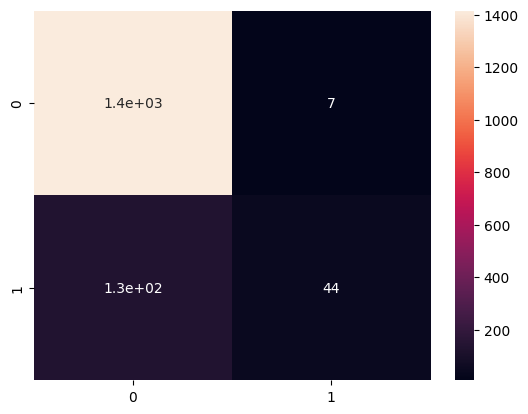

In [16]:
print(classification_report(y_test,y_prediksi))
sb.heatmap(confusion_matrix(y_test,y_prediksi),annot=True)

In [17]:
n_akurasi = []
for k in range (1,30):
    knn = KNeighborsClassifier(n_neighbors=k,metric='euclidean').fit(x_train,y_train)
    y_prediksi = knn.predict(x_test)
    akurasi = accuracy_score(y_test,y_prediksi)
    n_akurasi.append(akurasi)
print(n_akurasi)

[0.834375, 0.89875, 0.894375, 0.90125, 0.905625, 0.903125, 0.91125, 0.90625, 0.909375, 0.909375, 0.910625, 0.90875, 0.911875, 0.908125, 0.909375, 0.9075, 0.906875, 0.906875, 0.90875, 0.90625, 0.91, 0.90625, 0.90875, 0.9075, 0.911875, 0.908125, 0.9125, 0.90875, 0.91]


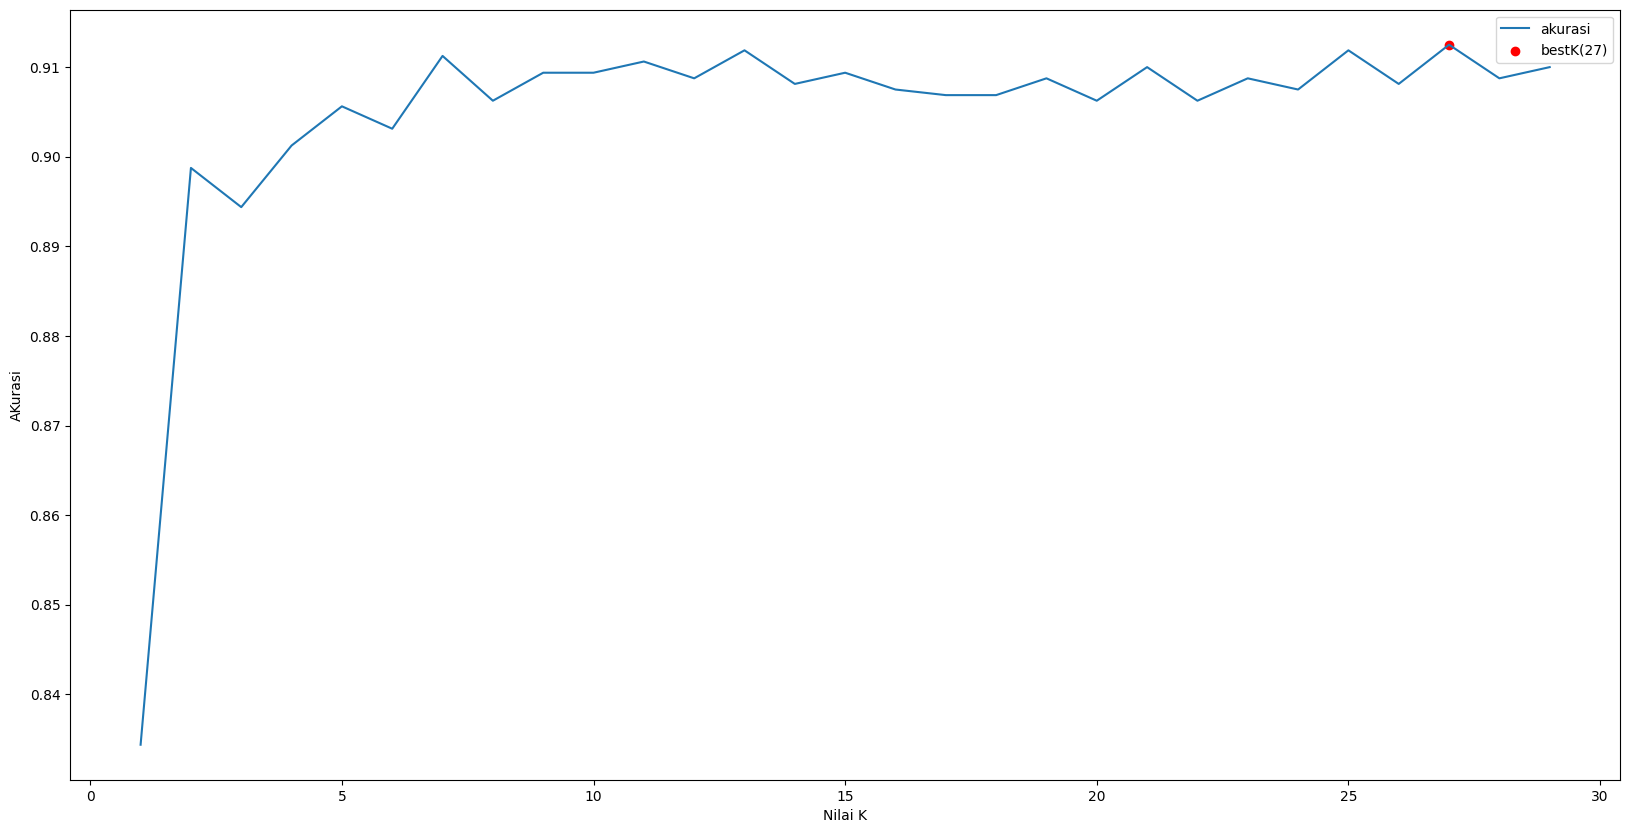

In [18]:
import matplotlib.pyplot as plt

import numpy as np
bestK = range(1,30)[np.argmax(n_akurasi)]


plt.figure(figsize=(20,10))
plt.plot(range(1,30),n_akurasi, label='akurasi')
plt.scatter(bestK, n_akurasi[bestK-1],color='red',marker='o' ,label=f'bestK({bestK})')
plt.xlabel('Nilai K')
plt.ylabel('AKurasi')
plt.legend()
plt.show()

In [19]:
data_baru = pd.read_excel('databaru_test_waterQuality.xlsx')
new_data = data_baru.iloc[:, :].values
new_prediksi = knn.predict(new_data)
print("Hasil Prediksi:\n")
for nomor, prediksi in enumerate(new_prediksi, start=1):
    print(f"Data baru {nomor}: {prediksi}")

Hasil Prediksi:

Data baru 1: 0
Data baru 2: 0
Data baru 3: 0
Data baru 4: 0
Data baru 5: 0
Data baru 6: 0
Data baru 7: 0
Data baru 8: 0
Data baru 9: 0
Data baru 10: 0
Data baru 11: 0
Data baru 12: 0
Data baru 13: 0
Data baru 14: 0
Data baru 15: 0
Data baru 16: 0
Data baru 17: 0
Data baru 18: 0
Data baru 19: 0
Data baru 20: 0
